# Homework 1
- ## Advection equation ---> Gaussian as initial condition, applying
    - FCTS
    - Lax Friedrichs
    - Leapfrog
    - Lax Wendroff

    cf = 0,5, J = 101 (and change them)
    periodic boundary conditions, try laso outflow boundary conditions

- ## Advection equation ---> with step function as initil condition, applying:
    - lax Friedrichs 
    - Lax Wendroff

    cf = 0.5 , J = 101 and change them
    
- ## Burgers equation ---> gaussian
    - unwid, flux conservative
    - non flux conservative upwind
    
    cf =0.5, J = 101
    periodic boundary conditions 


----------

## ADVECTION EQUATION 
- WITH GAUSSIAN AS INITIAL CONDITION
- with step function as initial condition

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# a : speed
# L = Domain length
# n = Number of grid points ----> aumentandolo si alza... diminuendo quindi dx
# dx : Grid spacing



# BOUNDARY CONDITIONS: 
# Compute the new solution using the FTCS method
    # Note: np.roll(u_current, -1) is equivalent to u(j+1) and
    #       np.roll(u_current,  1) is equivalent to u(j-1)
    # using np.roll is equivalent to use periodic boundary conditions

In [ ]:
def FTCS (u_current, a, dt, dx, boundary_condition='periodic'):
        if boundary_condition == 'periodic':
            u_next = u_current - a*dt/(2*dx)*(np.roll(u_current, -1) - np.roll(u_current, 1))  #if I'm not using python I need to wrtie the boundary cond...
        elif boundary_condition == 'outflow':
             
        return u_next  


def LAX_FRIEDRICHS(u_current, a, dt, dx):
    
    u_next = 1/2 * (np.roll(u_current, 1) + np.roll(u_current, -1)) - a*dt/(2*dx)*(np.roll(u_current, -1) - np.roll(u_current, 1))  #if I'm not using python I need to wrtie the boundary cond...  
    return u_next


def LAX_WENDROFF(u_current, a, dt, dx):

    u_next = u_current - a*dt/(2*dx)*(np.roll(u_current, -1) - np.roll(u_current, 1))+ a**2*dt**2/(2*dx**2)*(np.roll(u_current, -1) - 2 *u_current + np.roll(u_current, 1))  #if I'm not using python I need to wrtie the boundary cond...  
    return u_next


def LEAPFROG(u_current, u_previous, a, dt, dx, first_step=False):
    
    if first_step ==True:
        # If this is the first step, we need to use a different formula
        u_next = 1/2 * (np.roll(u_current, 1) + np.roll(u_current, -1)) - a*dt/(2*dx)*(np.roll(u_current, -1) - np.roll(u_current, 1))  #if I'm not using python I need to wrtie the boundary cond...  
    else:
        u_next = (u_previous) - a*dt/(dx)*(np.roll(u_current, -1) - np.roll(u_current, 1))  #if I'm not using python I need to wrtie the boundary cond...  

    return u_next

def L2_norm (u_current):
    return np.sqrt(np.sum(u_current**2)/len(u_current))
     

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import os

def advection_equation(L=10.0, nx=101, cf=0.5, a=1.0, t_final=20, x0=5,
                       u_initial='gaussian', method='FTCS', plots=True, movie=False):

    dx = L / (nx - 1)
    x = np.linspace(0, L, nx)
    dt = cf * dx / a 
    n_steps = int(t_final / dt)

    if u_initial == 'gaussian':
        u = np.exp(-((x - x0) ** 2))
    elif u_initial == 'step':  #u(x, t = 0) = 1 for x ∈ [4, 6] and u(x, t = 0) = 0 in the rest of the domain
        u = np.zeros_like(x)
        u[x >= 4 and x <=6] = 1.0
    else:
        raise ValueError("Use 'gaussian' or 'step'.")

    u_current = u.copy()
    l2norm = [L2_norm(u_current)]
    time = [0.0]

    snapshot_data = []  # Per i 12 snapshot
    snapshot_indices = set(np.linspace(0, n_steps, 12, dtype=int).tolist())
    snapshot_indices.add(n_steps)  # assicurati che il tempo finale venga incluso

    if movie:
        folder_name = "frames/movie/advection/" + method 
        os.makedirs(folder_name, exist_ok=True)

    t = 0.0
    for i in range(n_steps + 1):

        if i in snapshot_indices and plots:
            snapshot_data.append((t, u_current.copy()))

        if movie:
            fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 6), sharex=False)

            ax1.plot(x, u_current)
            ax1.set_ylabel('u')
            ax1.set_xlabel('x')
            ax1.set_title(f'u(x) at t={t:.2f}')
            ax1.grid()

            ax2.plot(time, l2norm)
            ax2.set_xlabel('Time')
            ax2.set_ylabel('L2 norm')
            ax2.set_title('L2 Norm Evolution')
            ax2.set_yscale('log')
            ax2.grid()

            plt.tight_layout()
            plt.savefig(folder_name + f"/frame_{i:04d}.png")
            plt.close()

        if i < n_steps:
            if method == 'FTCS':
                u_next = FTCS(u_current, a, dt, dx)
            elif method == 'LAX-FRIEDRICHS':
                u_next = LAX_FRIEDRICHS(u_current, a, dt, dx)
            elif method == 'LAX-WENDROFF':
                u_next = LAX_WENDROFF(u_current, a, dt, dx)
            elif method == 'LEAPFROG':
                if i == 0:
                    u_next = LEAPFROG(u_current, u_current, a, dt, dx, first_step=True)
                else:
                    u_next = LEAPFROG(u_current, u_previous, a, dt, dx, first_step=False)
                u_previous = u_current.copy()
            else:
                raise ValueError(" Use 'FTCS', 'LAX-FRIEDRICHS', 'LAX-WENDROFF', or 'LEAPFROG'.")

            u_current = u_next.copy()
            t += dt
            time.append(t)
            l2norm.append(L2_norm(u_current))


    plt.plot(time,l2norm)
    plt.yscale('log')
    plt.xlabel("Time")
    plt.ylabel("L2 norm")
    plt.show()

    if plots:
        fig, axes = plt.subplots(3, 4, figsize=(15, 9), sharex=True, sharey=True)
        for ax, (tt, uu) in zip(axes.flat, snapshot_data):
            ax.plot(x, uu)
            ax.set_title(f't = {tt:.2f}')
            ax.grid()
            ax.set_ylim(-0.3, 1.3)
            ax.set_xlabel('x')
            ax.set_ylabel('u')
        plt.suptitle(f'Advection Equation - {method}')
        plt.tight_layout()
        plt.show()

    if movie:
        
        import imageio
      
        frame_files = sorted([f for f in os.listdir(folder_name) if f.endswith('.png')])

        with imageio.get_writer(folder_name + ".gif", mode='I', duration=0.5) as writer:
            for fname in frame_files:
                image = imageio.imread(os.path.join(folder_name, fname))
                writer.append_data(image)

    return x, u_current, time,  l2norm

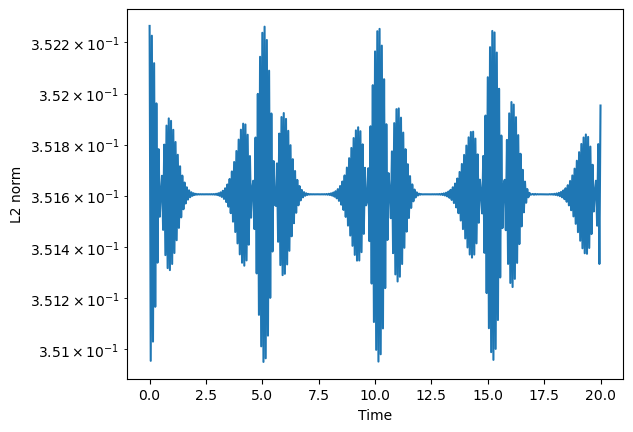

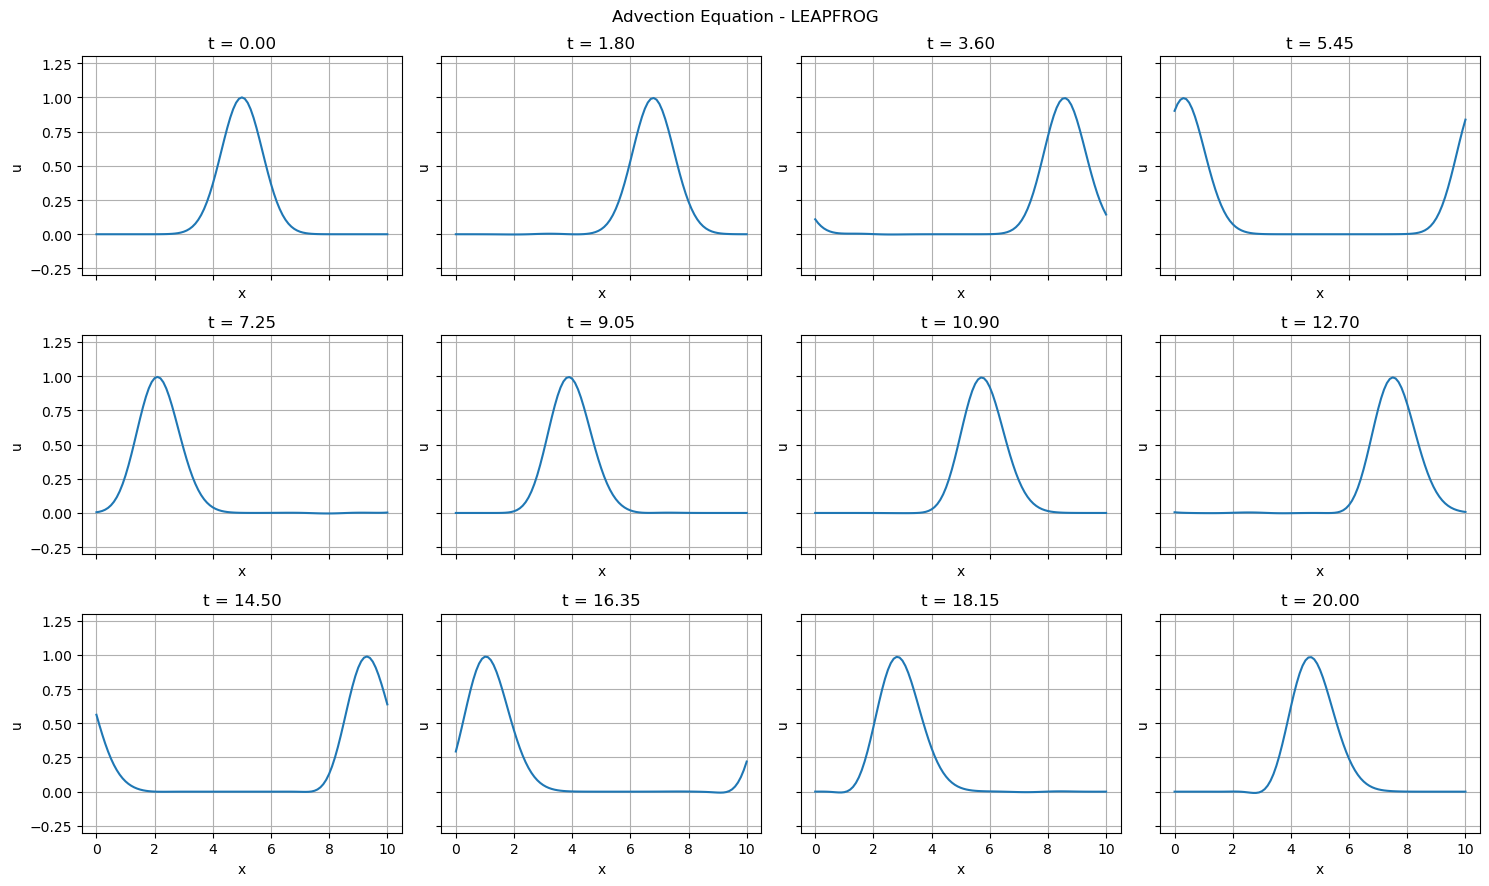

/tmp/ipykernel_61203/834364273.py:108: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(os.path.join(folder_name, fname))


In [5]:
x, u_final, time, l2norm = advection_equation(L=10.0, nx=101, cf=0.5, a=1.0, t_final=20, x0=5, u_initial='gaussian', method='LEAPFROG', plots=True, movie=True)

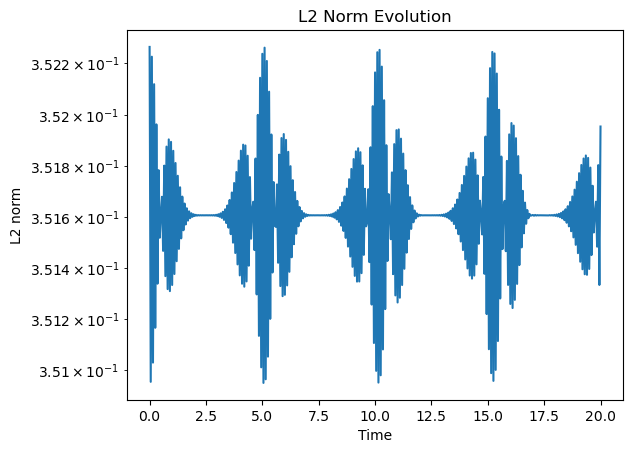

In [7]:
L = 10.0
nx = 101
cf = 0.5
a = 1.0
t_final = 20
x0 = 5


dx = L / (nx - 1)
dt = cf * dx / a 

time = np.arange(len(l2norm)) * dt

plt.plot(time,l2norm)
plt.xlabel("Time")
plt.ylabel("L2 norm")
plt.title("L2 Norm Evolution")
plt.yscale('log')
plt.show()


# Burgers' equation


still to do:
- various tries of burgers 
- TRYING DIFFERENT FACTORS IN ADVECTION 


- HOMEWORK 2 !

- begin writing the report !!!!!

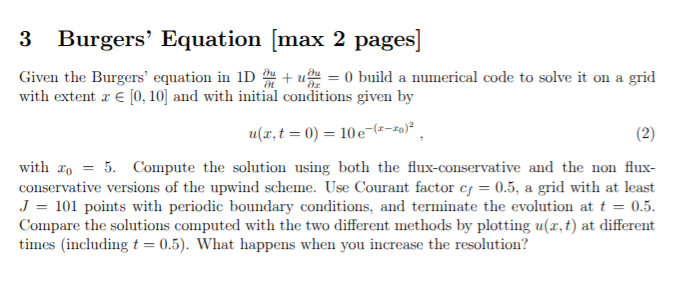

In [ ]:
def f(u):
    return 1/2 * u**2

def upwind(u_current, dt, dx, boundary_condition='periodic', flux_conservative=True ):
    # Upwind scheme for non-flux conservative form
    if flux_conservative:
        u_next = u_current - dt/(dx)*(f(u_current) - f(np.roll(u_current, 1)) )  #if I'm not using python I need to write the boundary cond...  
    else:
        u_next = u_current - dt* u_current/(dx)*(u_current - np.roll(u_current, 1))  #if I'm not using python I need to write the boundary cond... 
        
    return u_next



def L2_norm (u_current):
    return np.sqrt(np.sum(u_current**2)/len(u_current))

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os

def burgers_equation(L=10.0, nx=101, cf=0.5, a=1.0, t_final=20, x0=5,
                       u_initial='gaussian', method='upwind', plots=True, movie=False):

    dx = L / (nx - 1)
    x = np.linspace(0, L, nx)
    dt = cf * dx / a 
    n_steps = int(t_final / dt)

    if u_initial == 'gaussian':
        u = 10 * np.exp(-((x - x0) ** 2))
    elif u_initial == 'step':  #u(x, t = 0) = 1 for x ∈ [4, 6] and u(x, t = 0) = 0 in the rest of the domain
        u = np.zeros_like(x)
        u[x >= 4 and x <=6] = 1.0
    else:
        raise ValueError("Use 'gaussian' or 'step'.")

    u_current = u.copy()
    l2norm = [L2_norm(u_current)]
    time = [0.0]

    snapshot_data = []  # Per i 12 snapshot
    snapshot_indices = set(np.linspace(0, n_steps, 12, dtype=int).tolist())
    snapshot_indices.add(n_steps)  # assicurati che il tempo finale venga incluso

    if movie:
        folder_name = "frames/movie/burgers/" + method 
        os.makedirs(folder_name, exist_ok=True)

    t = 0.0
    for i in range(n_steps + 1):

        if i in snapshot_indices and plots:
            snapshot_data.append((t, u_current.copy()))

        if movie:
            fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 6), sharex=False)

            ax1.plot(x, u_current)
            ax1.set_ylabel('u')
            ax1.set_xlabel('x')
            ax1.set_title(f'u(x) at t={t:.2f}')
            ax1.grid()

            ax2.plot(time, l2norm)
            ax2.set_xlabel('Time')
            ax2.set_ylabel('L2 norm')
            ax2.set_title('L2 Norm Evolution')
            ax2.set_yscale('log')
            ax2.grid()

            plt.tight_layout()
            plt.savefig(folder_name + f"/frame_{i:04d}.png")
            plt.close()

        if i < n_steps:
            if method == 'upwind_non_flux_conservative':
                u_next = upwind(u_current, a, dt, dx, flux_conservative=False)
            elif method == 'upwind_flux_conservative':
                u_next = upwind(u_current, a, dt, dx, flux_conservative=True)

            else:
                raise ValueError(" Use 'upwind_non_flux_conservative' or'upwind_flux_conservative'.")

            u_current = u_next.copy()
            t += dt
            time.append(t)
            l2norm.append(L2_norm(u_current))


    plt.plot(time,l2norm)
    plt.yscale('log')
    plt.xlabel("Time")
    plt.ylabel("L2 norm")
    plt.show()

    if plots:
        fig, axes = plt.subplots(3, 4, figsize=(15, 9), sharex=True, sharey=True)
        for ax, (tt, uu) in zip(axes.flat, snapshot_data):
            ax.plot(x, uu)
            ax.set_title(f't = {tt:.2f}')
            ax.grid()
            ax.set_ylim(-0.3, 1.3)
            ax.set_xlabel('x')
            ax.set_ylabel('u')
        plt.suptitle(f'Burgers\' Equation - {method}')
        plt.tight_layout()
        plt.show()

    if movie:
        
        import imageio
      
        frame_files = sorted([f for f in os.listdir(folder_name) if f.endswith('.png')])

        with imageio.get_writer(folder_name + ".gif", mode='I', duration=0.5) as writer:
            for fname in frame_files:
                image = imageio.imread(os.path.join(folder_name, fname))
                writer.append_data(image)

    return x, u_current, time,  l2norm

In [ ]:
import numpy as np

# Define the domain
L = 10.0     # Domain length
nx = 101    # Number of grid points
dx = L/(nx-1)   # Grid spacing
x = np.linspace(0, L, nx)

##print(x,'\n',dx) #just a check

# Define the initial condition
x0=5
u_initial = 10 * np.exp(-(x-x0)**2)
# Define the time step and the final time
cf = 0.5
dt = cf*dx/np.max(u_initial)   # Time step ---> cf * dt / (max of velocity) -----> max of u_initial 
t_final = 0.5

print('nx=',nx)
print('dx=',dx)
print('dt=',dt)
print('Number of iterations=',t_final/dt)


# Initialize the solution array
u_current = u_initial.copy()

#we create arrays where we will store the time and the l2norm
l2norm=[]
l2norm.append(np.sqrt(np.sum(u_current**2)/len(u_current)))

time=[]
time.append(0.0)

nx= 101
dx= 0.1
dt= 0.005
Number of iterations= 100.0


In [ ]:
import matplotlib.pyplot as plt
import os
##create directory where to save images
print(os.getcwd())

os.makedirs('./Burger_images')

os.listdir('./')

/home/malvi/Documents/numerical relativity/numerical_rel/Advection_Burger/Burgers_equation


['movie.mp4',
 'Burger_images',
 '.ipynb_checkpoints',
 'movie_flux_cons.mp4',
 'Burgers_eq.ipynb']

# non flux-conservative solution

In [ ]:
# Initilize time and iteration counter
t = 0.0
i = 0
# Initialize the solution array
u_current = u_initial.copy()

#save the initial conditions
plt.plot(x, u_current)
plt.title('Time='+str(round(t,2)))
plt.ylim(0,10.1)
plt.savefig('./Burger_images/fig_'+str(i).zfill(5)+'.png', dpi=200)
#plt.close()



#solve the advection equation
while t < t_final:
    # Compute the new solution using the FTCS method
    # Note: np.roll(u_current, -1) is equivalent to u(j+1) and
    #       np.roll(u_current,  1) is equivalent to u(j-1)
    # using np.roll is equivalent to use periodic boundary conditions
    u_next = u_current - dt* u_current/(dx)*(u_current - np.roll(u_current, 1))  #if I'm not using python I need to write the boundary cond...  
    
    # Update the solution
    u_current = u_next.copy()
    
    
    #advance the time 
    t += dt
    i += 1
    
    #compute the l2 norm and add the time to the time vector
    l2norm.append(np.sqrt(np.sum(u_current**2)/len(u_current)))
    time.append(t)
    


    #plot the current result and save in an image every 10 iterations
    if (i%5==0):
        plt.plot(x, u_current)
        plt.title('Time='+str(round(t,2)))
        plt.ylim(0,10.1)
        plt.savefig('./Burger_images/fig_'+str(i).zfill(5)+'.png', dpi=200)
        plt.close()


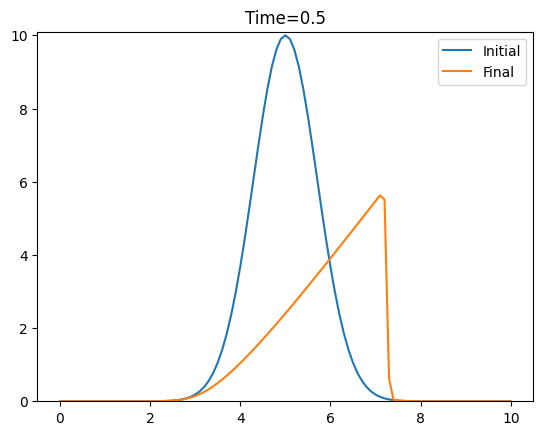

In [ ]:
# Plot the final solution
plt.plot(x, u_initial, label='Initial')
plt.plot(x, u_current, label='Final')
plt.title('Time='+str(round(t,2)))
plt.ylim(0,10.1)
plt.legend()
plt.show()

In [ ]:
# set the directory where your images are stored
directory = "./Burger_images/"

# get the list of image files in the directory
files = os.listdir(directory)

print(files, '\n')
print(len(files))

# sort the files in alphanumeric order
files=sorted(files)

print(files)




['fig_00005.png', 'fig_00095.png', 'fig_00020.png', 'fig_00060.png', 'fig_00085.png', 'fig_00065.png', 'fig_00100.png', 'fig_00040.png', 'fig_00010.png', 'fig_00080.png', 'fig_00045.png', 'fig_00025.png', 'fig_00035.png', 'fig_00055.png', 'fig_00050.png', 'fig_00090.png', 'fig_00030.png', 'fig_00015.png', 'fig_00075.png', 'fig_00000.png', 'fig_00070.png'] 

21
['fig_00000.png', 'fig_00005.png', 'fig_00010.png', 'fig_00015.png', 'fig_00020.png', 'fig_00025.png', 'fig_00030.png', 'fig_00035.png', 'fig_00040.png', 'fig_00045.png', 'fig_00050.png', 'fig_00055.png', 'fig_00060.png', 'fig_00065.png', 'fig_00070.png', 'fig_00075.png', 'fig_00080.png', 'fig_00085.png', 'fig_00090.png', 'fig_00095.png', 'fig_00100.png']


In [ ]:
import imageio
with imageio.get_writer('./movie.mp4', mode='I', quality=10) as writer:
    for file in files:
        image = imageio.imread('./Burger_images/'+file)
        writer.append_data(image)
        
files=[]


/tmp/ipykernel_32184/2249862637.py:4: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread('./Burger_images/'+file)


In [ ]:
# don't worry about the code in this cell, it is just to let you 
# display the movies you generated above in Jupyter notebook
from IPython.display import HTML

HTML("""
<div align="middle">
<video width="80%" controls>
      <source src="./movie.mp4" type="video/mp4">
</video></div>""")

# flux conservative solution

In [ ]:
import matplotlib.pyplot as plt
import os
##create directory where to save images
print(os.getcwd())

os.makedirs('./Burger_flux_cons_images')

os.listdir('./')

/home/malvi/Documents/numerical relativity/numerical_rel/Advection_Burger/Burgers_equation


['movie.mp4',
 'Burger_images',
 'Burger_flux_cons_images',
 '.ipynb_checkpoints',
 'movie_flux_cons.mp4',
 'Burgers_eq.ipynb']

In [ ]:
# Initialize the solution array
u_current_f = u_initial.copy()

#we create arrays where we will store the time and the l2norm
l2norm=[]
l2norm.append(np.sqrt(np.sum(u_current_f**2)/len(u_current_f)))

time=[]
time.append(0.0)

In [ ]:
def f(u):
    return 1/2 * u**2

In [ ]:
# Initilize time and iteration counter
t = 0.0
i = 0


#save the initial conditions
plt.plot(x, u_current_f)
plt.title('Time='+str(round(t,2)))
plt.ylim(0,10.1)
plt.savefig('./Burger_flux_cons_images/fig_'+str(i).zfill(5)+'.png', dpi=200)
plt.close()



#solve the advection equation
while t < t_final:
    # Compute the new solution using the FTCS method
    # Note: np.roll(u_current, -1) is equivalent to u(j+1) and
    #       np.roll(u_current,  1) is equivalent to u(j-1)
    # using np.roll is equivalent to use periodic boundary conditions
    u_next_f = u_current_f - dt/(dx)*(f(u_current_f) - f(np.roll(u_current_f, 1)) )  #if I'm not using python I need to write the boundary cond...  
    
    # Update the solution
    u_current_f = u_next_f.copy()
    
    
    #advance the time 
    t += dt
    i += 1
    
    #compute the l2 norm and add the time to the time vector
    l2norm.append(np.sqrt(np.sum(u_current_f**2)/len(u_current_f)))
    time.append(t)
    


    #plot the current result and save in an image every 10 iterations
    if (i%5==0):
        plt.plot(x, u_current_f)
        plt.title('Time='+str(round(t,2)))
        plt.ylim(0,10.1)
        plt.savefig('./Burger_flux_cons_images/fig_'+str(i).zfill(5)+'.png', dpi=200)
        plt.close()


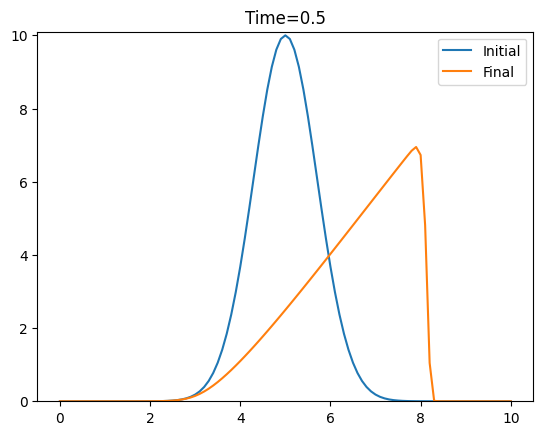

In [ ]:
# Plot the final solution
plt.plot(x, u_initial, label='Initial')
plt.plot(x, u_current_f, label='Final')
plt.title('Time='+str(round(t,2)))
plt.ylim(0,10.1)
plt.legend()
plt.show()

In [ ]:
# set the directory where your images are stored
directory = "./Burger_flux_cons_images/"

# get the list of image files in the directory
files = os.listdir(directory)

print(files, '\n', len(files))

# sort the files in alphanumeric order
files=sorted(files)

print(files)




['fig_00005.png', 'fig_00095.png', 'fig_00020.png', 'fig_00060.png', 'fig_00085.png', 'fig_00065.png', 'fig_00100.png', 'fig_00040.png', 'fig_00010.png', 'fig_00080.png', 'fig_00045.png', 'fig_00025.png', 'fig_00035.png', 'fig_00055.png', 'fig_00050.png', 'fig_00090.png', 'fig_00030.png', 'fig_00015.png', 'fig_00075.png', 'fig_00000.png', 'fig_00070.png'] 
 21
['fig_00000.png', 'fig_00005.png', 'fig_00010.png', 'fig_00015.png', 'fig_00020.png', 'fig_00025.png', 'fig_00030.png', 'fig_00035.png', 'fig_00040.png', 'fig_00045.png', 'fig_00050.png', 'fig_00055.png', 'fig_00060.png', 'fig_00065.png', 'fig_00070.png', 'fig_00075.png', 'fig_00080.png', 'fig_00085.png', 'fig_00090.png', 'fig_00095.png', 'fig_00100.png']


In [ ]:
import imageio
with imageio.get_writer('./movie_flux_cons.mp4', mode='I', quality=10) as writer:
    for file in files:
        image = imageio.imread('./Burger_flux_cons_images/'+file)
        writer.append_data(image)
        
files=[]


/tmp/ipykernel_32184/398589310.py:4: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread('./Burger_flux_cons_images/'+file)


# Comparison

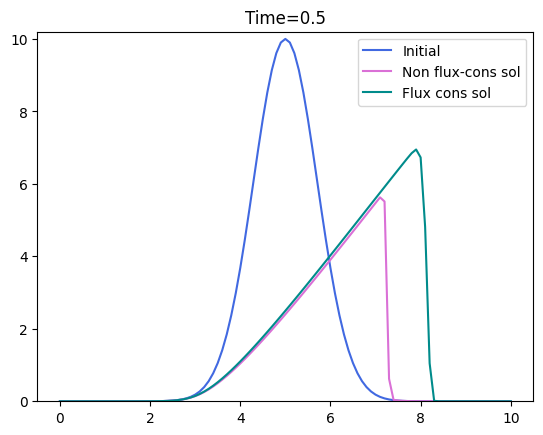

In [ ]:
plt.plot(x, u_initial, label='Initial',c = "royalblue")
plt.plot(x, u_current, label='Non flux-cons sol', c = "orchid")
plt.plot(x, u_current_f, label='Flux cons sol', c = "darkcyan")
plt.title('Time='+str(round(t,2)))
plt.ylim(0,10.2)
plt.legend(loc = 'best')
plt.show()

In [ ]:
# don't worry about the code in this cell, it is just to let you 
# display the movies you generated above in Jupyter notebook
from IPython.display import HTML

HTML("""
<div align="middle">
<video width="80%" controls>
      <source src="./movie_flux_cons.mp4" type="video/mp4">
</video></div>""")

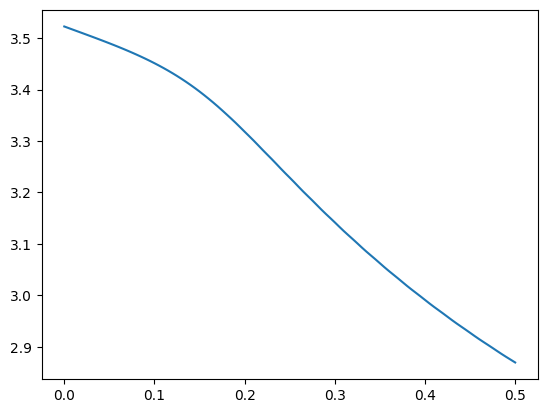

In [ ]:
plt.plot(time,l2norm)
plt.show()